In [1]:
from tensorflow.keras.models import model_from_json

In [2]:
json_file = open("emotion_model.json", "r")

In [3]:
loaded_model_json = json_file.read()

In [4]:
json_file.close()

In [5]:
emotion_model = model_from_json(loaded_model_json)

In [6]:
emotion_model.load_weights("emotion_model..weights.h5")

In [7]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4:"Neutral", 5: "Sad", 6: "Surprised"}

In [8]:
import numpy as np

In [9]:
import cv2

In [10]:
import matplotlib.pyplot as plt

In [22]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [23]:
img = cv2.imread("aşkom2.jpeg")

In [24]:
img = cv2.resize(img, (600,600))

In [25]:
img = cv2.convertScaleAbs(img, beta=50)

In [26]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

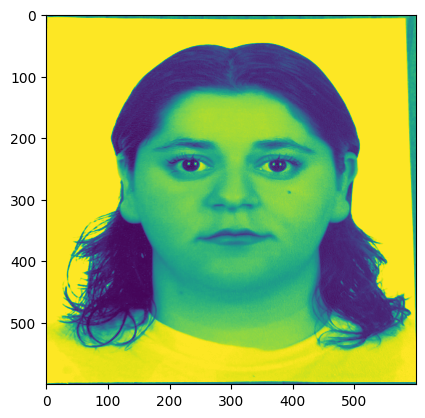

In [27]:
plt.imshow(gray_img)

In [28]:
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)

In [29]:
faces

array([[133, 111, 347, 347]], dtype=int32)

In [30]:
if len(faces) == 0:
    print("No face detected!")

In [31]:
(x, y, w, h) = faces[0]

In [32]:
face_img = gray_img[y: y+h, x:x+w]

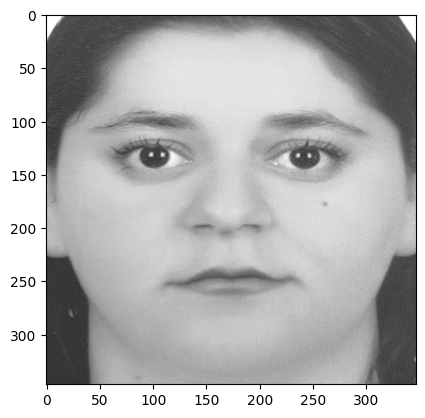

In [33]:
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))

In [34]:
resized_img = cv2.resize(face_img, (48,48))

In [35]:
img_pixels = resized_img.astype('float32') / 255.0

In [36]:
img_pixels = np.expand_dims(img_pixels, axis=-1)

In [37]:
img_pixels = np.expand_dims(img_pixels, axis=0)

In [38]:
predictions = emotion_model.predict(img_pixels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [39]:
predictions

array([[1.34572685e-02, 2.07257181e-04, 6.15795851e-02, 9.05808434e-03,
        8.10667813e-01, 7.46695176e-02, 3.03604938e-02]], dtype=float32)

In [40]:
max_index = np.argmax(predictions[0])

In [41]:
predicted_emotion = emotion_dict[max_index]

In [42]:
predicted_emotion

'Neutral'